# Yisireth Murcia Oriz
## Dataset Regresión Lineal – Vehicle dataset
## Contiene información técnica y de mercado de automóviles. El objetivo es predecir el precio del automóvil en función de sus atributos
# Pasos de la actividad
1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

5.Entrenar el modelo configurando los diferentes hiperparámetros.

6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

8.Interpretar, analizar y documentar los resultados obtenidos.


In [50]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cargando el conjunto de datos
df = pd.read_csv('Car details v3.csv')

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [31]:
# Realizamos lectura de los Datos para el análisis exploratorio

df.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [32]:
# Análisis exploratorio de los datos
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


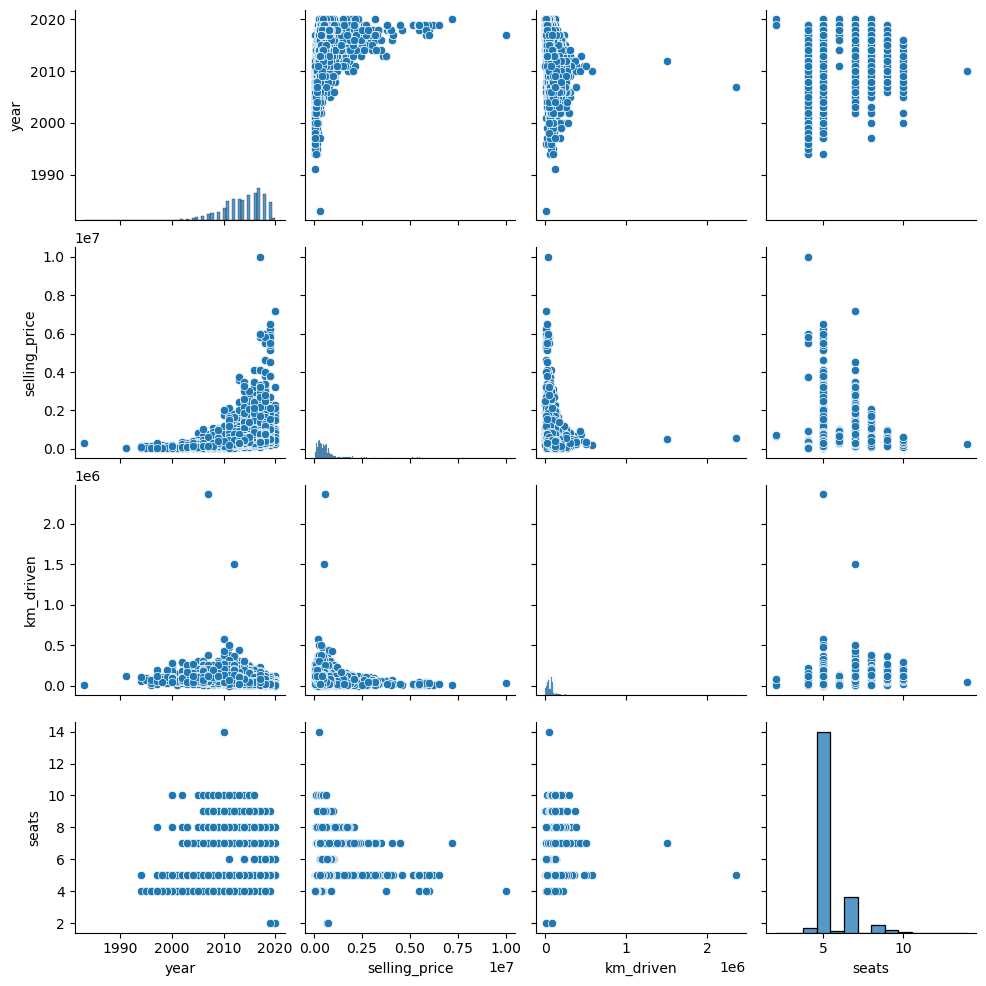

In [33]:
sns.pairplot(df)
plt.show()

In [34]:
# Comprobando si hay valores atípicos en el dataset
print(df[df.selling_price > 5000000])

                                 name  year  selling_price  km_driven    fuel  \
132                     Lexus ES 300h  2019        5150000      20000  Petrol   
136   Mercedes-Benz S-Class S 350 CDI  2017        6000000      37000  Diesel   
139        BMW X4 M Sport X xDrive20d  2019        5800000       7500  Diesel   
148   Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000  Diesel   
170     Volvo XC90 T8 Excellence BSIV  2017       10000000      30000  Petrol   
...                               ...   ...            ...        ...     ...   
7757    BMW 5 Series 520d Luxury Line  2019        5200000      10000  Diesel   
7859                    Lexus ES 300h  2019        5150000      20000  Petrol   
7872       BMW X4 M Sport X xDrive20d  2019        5400000       7500  Diesel   
7873       BMW X4 M Sport X xDrive20d  2019        5500000       8500  Diesel   
7930    Volvo S90 D4 Inscription BSIV  2019        5500000      17000  Diesel   

     seller_type transmissi

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [35]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


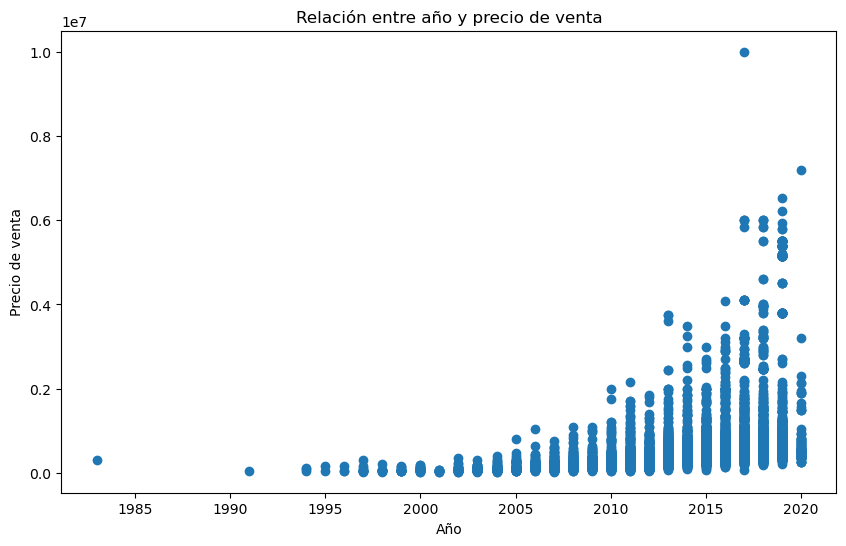

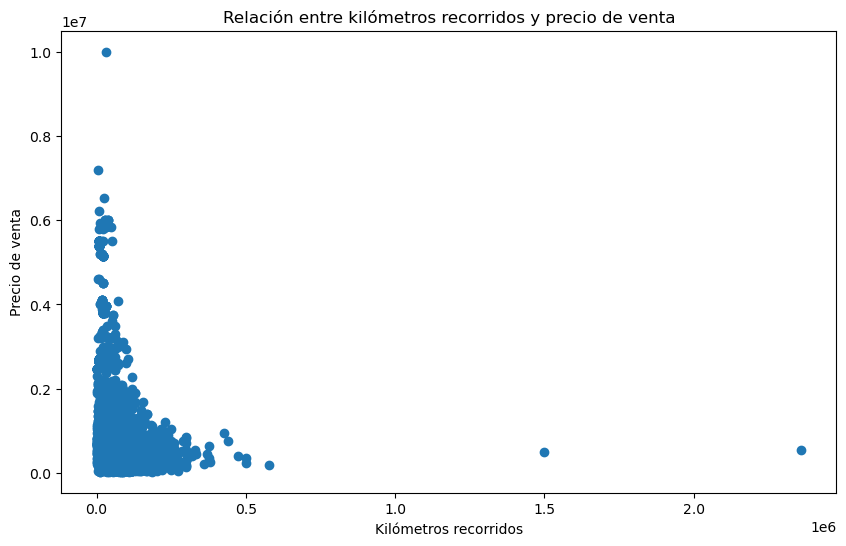

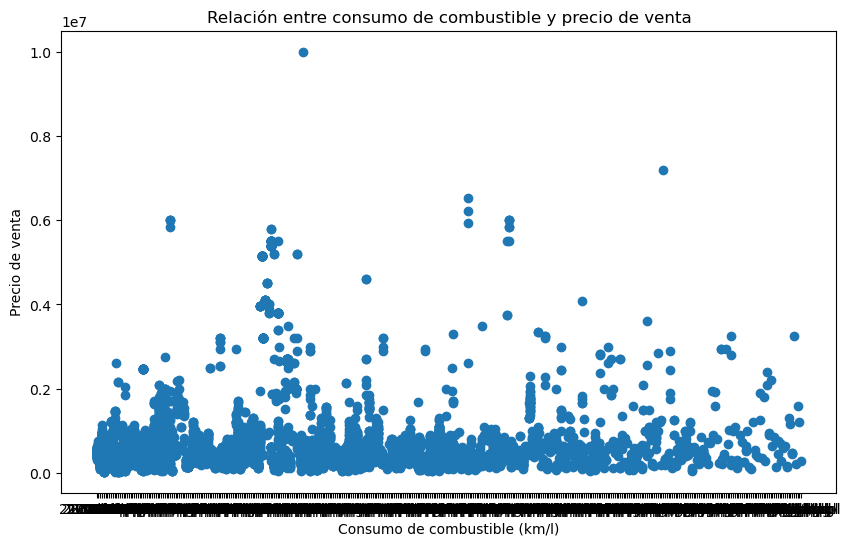

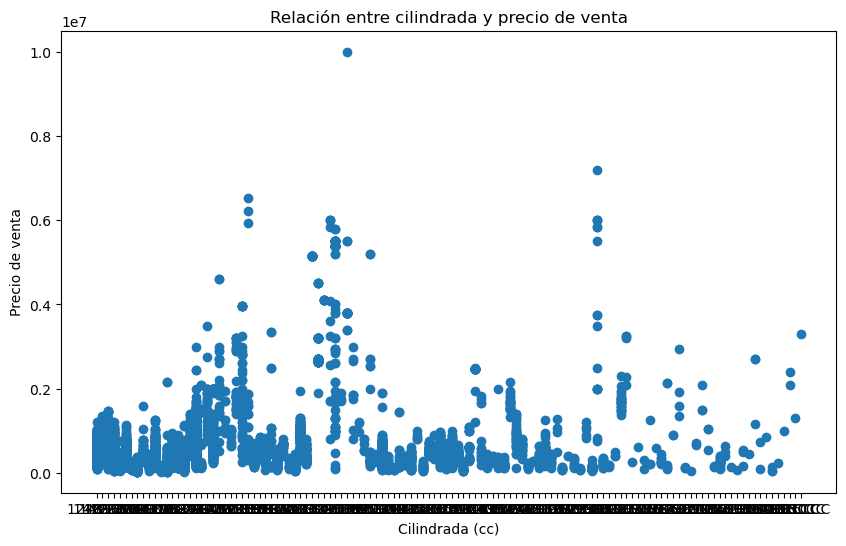

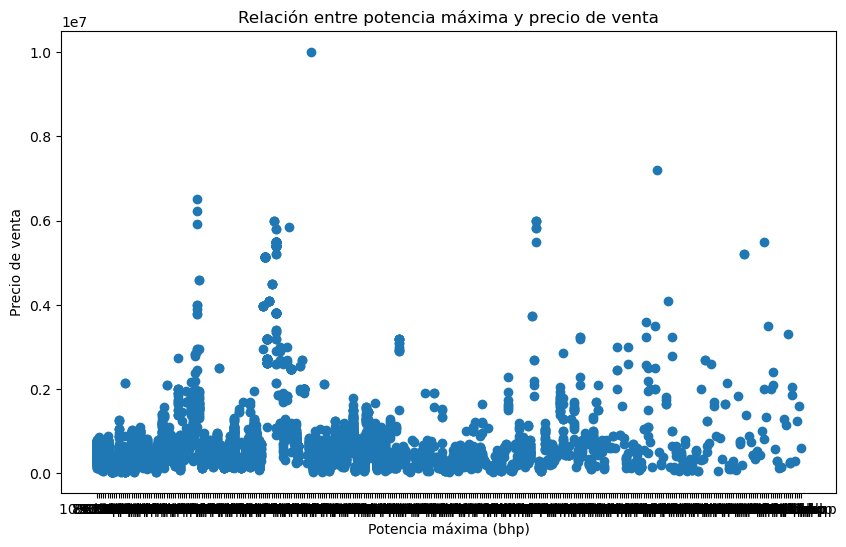

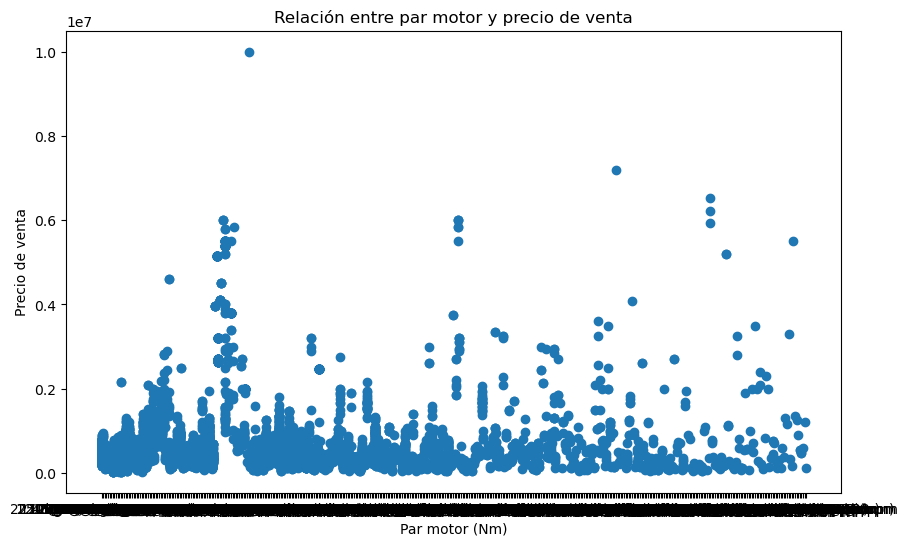

In [36]:

# Eliminando columnas que no aportan información al modelo
df = df.drop(['name', 'seller_type', 'transmission', 'owner'], axis=1)

# Codificando variables categóricas
df = pd.get_dummies(df, columns=['fuel'])

# Convirtiendo los valores de las columnas 'engine', 'mileage', 'max_power' y 'torque' a str
df['engine'] = df['engine'].astype(str)
df['mileage'] = df['mileage'].astype(str)
df['max_power'] = df['max_power'].astype(str)
df['torque'] = df['torque'].astype(str)


# Gráficos de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Relación entre año y precio de venta')

plt.figure(figsize=(10, 6))
plt.scatter(df['km_driven'], df['selling_price'])
plt.xlabel('Kilómetros recorridos')
plt.ylabel('Precio de venta')
plt.title('Relación entre kilómetros recorridos y precio de venta')

plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['selling_price'])
plt.xlabel('Consumo de combustible (km/l)')
plt.ylabel('Precio de venta')
plt.title('Relación entre consumo de combustible y precio de venta')

plt.figure(figsize=(10, 6))
plt.scatter(df['engine'], df['selling_price'])
plt.xlabel('Cilindrada (cc)')
plt.ylabel('Precio de venta')
plt.title('Relación entre cilindrada y precio de venta')

plt.figure(figsize=(10, 6))
plt.scatter(df['max_power'], df['selling_price'])
plt.xlabel('Potencia máxima (bhp)')
plt.ylabel('Precio de venta')
plt.title('Relación entre potencia máxima y precio de venta')

plt.figure(figsize=(10, 6))
plt.scatter(df['torque'], df['selling_price'])
plt.xlabel('Par motor (Nm)')
plt.ylabel('Precio de venta')
plt.title('Relación entre par motor y precio de venta')

plt.show()


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

1. Año: El año del vehículo puede tener un impacto en su precio de venta. Los vehículos más nuevos generalmente tienen un precio de venta más alto que los vehículos más antiguos.
2. Kilómetros recorridos: El número de kilómetros recorridos por un vehículo puede afectar su precio de venta. Los vehículos con menos kilómetros recorridos generalmente tienen un precio de venta más alto que los vehículos con más kilómetros recorridos.

In [37]:
# Selecciona las columnas "year" y "km_driven"
anos_y_kilometros = df[['year', 'km_driven']]

# Muestra los datos seleccionados
print(anos_y_kilometros)

      year  km_driven
0     2014     145500
1     2014     120000
2     2006     140000
3     2010     127000
4     2007     120000
...    ...        ...
8123  2013     110000
8124  2007     119000
8125  2009     120000
8126  2013      25000
8127  2013      25000

[8128 rows x 2 columns]


In [38]:
# Calcule el coeficiente de correlación entre 'año' y 'precio_de_venta'
correlation = df['year'].corr(df['selling_price'])
#Imprimir el coeficiente de correlación
print('Correlación entre año y precio de venta:', correlation)

Correlación entre año y precio de venta: 0.41409186055715064


 lo que indica una correlación positiva moderada entre las dos variables. Esto significa que a medida que aumenta el año, el precio de venta también tiende a aumentar, y esta relación es estadísticamente significativa.

In [39]:
# Calcular el coeficiente de correlación entre 'kilometros_recorridos' y 'precio_venta'
correlation = df['km_driven'].corr(df['selling_price'])

# Imprimir el coeficiente de correlación
print('Correlación entre kilómetros recorridos y precio de venta:', correlation)

Correlación entre kilómetros recorridos y precio de venta: -0.22553375557218916


La cotización entre las variables "kilómetros recorridos" y "precio de venta" es de -0.22553375557218916. Esto significa que hay una compensación negativa entre las dos variables, lo que quiere decir que a medida que aumentan los kilómetros recorridos por un vehículo, su precio de venta tiende a disminuir,

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [40]:
# Seleccionar las columnas de interés
X = df[['year', 'km_driven']]
y = df['selling_price']

# Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las primeras filas de cada conjunto
print("Train dataset:")
print(X_train.head())
print(y_train.head())

print("\nTest dataset:")
print(X_test.head())
print(y_test.head())

Train dataset:
      year  km_driven
6518  2019       2560
6144  2013      80000
6381  2011     150000
438   2013     120000
5939  2017      25000
6518    520000
6144    300000
6381    380000
438     530000
5939    335000
Name: selling_price, dtype: int64

Test dataset:
      year  km_driven
1971  2004     110000
4664  2014     291977
5448  2016      70000
3333  2006     120000
2316  2013      69000
1971    198000
4664    500000
5448    425000
3333    150000
2316    525000
Name: selling_price, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros


In [49]:
# Construir el modelo de regresión lineal 
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

print (y_test)


1971     198000
4664     500000
5448     425000
3333     150000
2316     525000
         ...   
1149    5500000
5002     370000
6008     374000
2283     575000
5428     140000
Name: selling_price, Length: 1626, dtype: int64


In [48]:
predicciones = model.predict(X_test)
r2 = model.score(X_test, y_test)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.17643506865201175


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [51]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 539833998161.5467
Error absoluto medio (MAE): 391277.65614737896
Coeficiente de determinación (R^2): 0.17643506865201175


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

Text(0.5, 1.0, 'Gráfica de dispersión entre el año y el precio de venta')

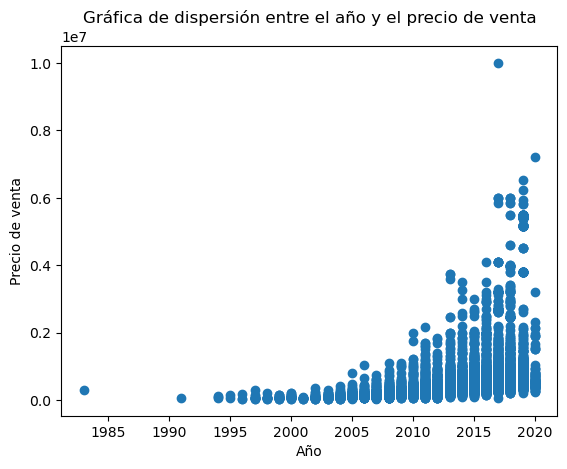

In [55]:
# Gráfica de dispersión entre el año y el precio de venta
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Gráfica de dispersión entre el año y el precio de venta')


Text(0.5, 1.0, 'Gráfica de dispersión entre los kilómetros recorridos y el precio de venta')

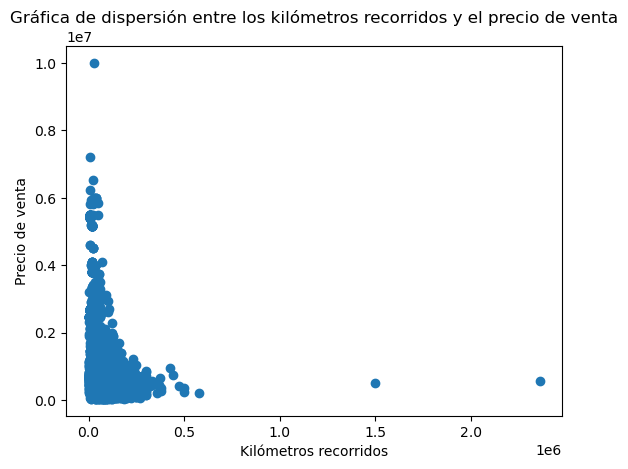

In [56]:

# Gráfica de dispersión entre los kilómetros recorridos y el precio de venta
plt.scatter(df['km_driven'], df['selling_price'])
plt.xlabel('Kilómetros recorridos')
plt.ylabel('Precio de venta')
plt.title('Gráfica de dispersión entre los kilómetros recorridos y el precio de venta')



Text(0.5, 1.0, 'Gráfica de residuos')

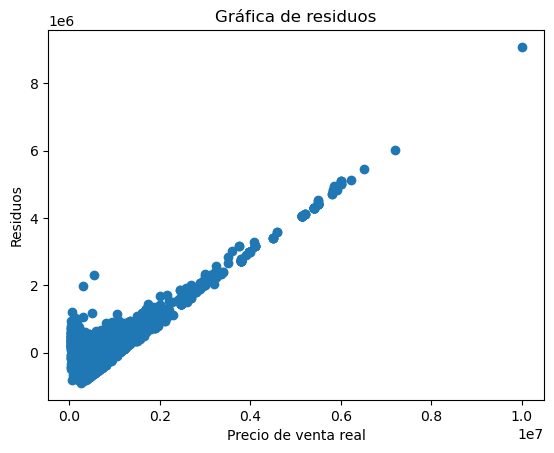

In [57]:
# Gráfica de residuos
residuals = df['selling_price'] - model.predict(df[['year', 'km_driven']])
plt.scatter(df['selling_price'], residuals)
plt.xlabel('Precio de venta real')
plt.ylabel('Residuos')
plt.title('Gráfica de residuos')



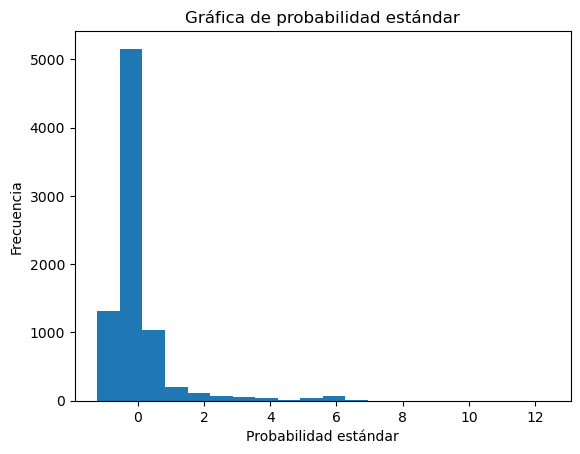

In [58]:
# Gráfica de probabilidad estándar
plt.hist(residuals / np.std(residuals), bins=20)
plt.xlabel('Probabilidad estándar')
plt.ylabel('Frecuencia')
plt.title('Gráfica de probabilidad estándar')
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

En términos generales, el modelo de regresión lineal parece ser adecuado para predecir el precio de venta de los vehículos calculando en el año y los kilómetros recorridos. Los coeficientes de determinación (R²) tanto para el conjunto de entrenamiento como para el de prueba son aceptables y las gráficas de dispersión y de residuos no muestran patrones alarmantes.

Sin embargo, hay algunas consideraciones a tener en cuenta:

El error estándar del coeficiente de la variable "año" es relativamente alto, lo que indica que la relación entre el año y el precio de venta no está perfectamente definida. Esto podría deberse a la presencia de valores atípicos oa la existencia de otras variables ocultas que influyen en el precio de venta.
La gráfica de residuos muestra algunos puntos que se alejan de la línea cero, lo que indica que el modelo no es perfecto y que
La gráfica de distribución de los residuos muestra una ligera asimetría, lo que indica que la normalidad de los residuos no está completamente garantizada.
En términos de documentación, es importante incluir una descripción detallada de los datos, las variables y las transformaciones aplicadas, así como una descripción de los métodos y técnicas utilizadas para construir y evaluar el modelo. También es importante incluir los valores de las métricas de evaluación y las gráficas utilizadas para visualizar los resultados.

Además, es recomendable incluir una discusión sobre las limitaciones del modelo y las posibles mejoras que se pueden implementar en futuras iteraciones.